- We have some useful functions you can use as post-processing tool in this notebook. Most of the functions are self-explanatory and hidden inside "myutils" and "plot_utils". 

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
import os
import math

from myutils import get_image_annotation_pairs,get_pred_box,get_image_box
from plot_utils import plot_mAP,plot_detection_sample,add_speed, plot_speed,plot_missed_frames

In [2]:
model_droplet = YOLO('best_yolov8_droplet.pt')
model_int = YOLO('best_yolov8_intruder.pt')

## Training Results Plot

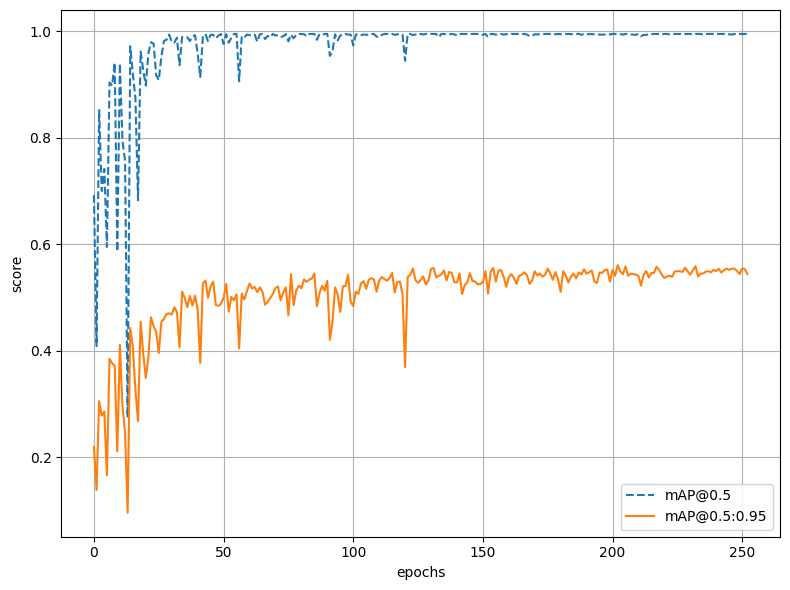

In [3]:
#plot mAP for model tranining
train_data = pd.read_csv("train_results/droplet.csv",skipinitialspace = True)
plot_mAP(train_data)

## Detection Samples Plots

displaying dataset/combined_droplet/test/images/1188 (3).jpg
dataset/combined_droplet/test/labels/1188 (3).txt


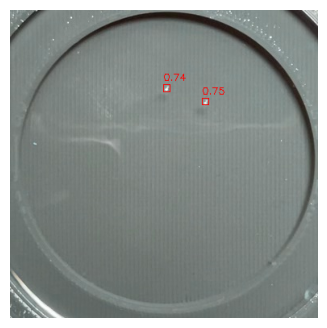

In [7]:
test_dir = "dataset/combined_droplet/test/"
#num<len(test_images)
plot_detection_sample(model=model_droplet,test_dir=test_dir,num=3)

# SOTA Tracker Results

We manually checked all the tracker results and saved them to "tracking_results/sota_tracks.csv". It is a binary dataframe, where 0 means the presence of some form of ID switch and 1 means tracking without any ID switch. Notice that all of the trackers fail for multiple droplet experiments and only few succeed for granular intruder experiments. I highly encoruage you to go ahead and watch some of these videos in "yolov8_tracking/sota_tracks".

In [210]:
data = pd.read_csv("tracking_results/sota_tracks.csv",index_col=0)

# Replace 'X' with 0 and 'P' with 1
data.replace({'X': 0, 'P': 1}, inplace=True)

data.head()

,StrongSORT,OC-Sort,Deep OC-SORT,BoT-SORT,ByteTrack
Experiment,,,,,
Three Droplet,0,0,0,0,0
Two Droplet,0,0,0,0,0
3white,0,0,0,0,1
2white2black-10m,0,0,0,0,1
2white2black-20m,0,1,1,0,1


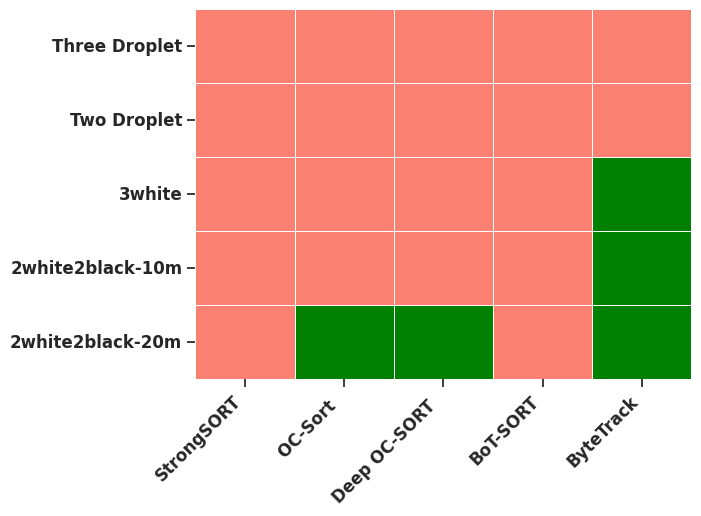

In [263]:
# Create a colormap with red for 0 and green for 1
cmap = sns.color_palette(["salmon", "green"])

# Plot the heatmap
ax = sns.heatmap(data, cmap=cmap,cbar=False,linewidth=.5)

# Rotate the xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12,weight='bold',ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12,weight='bold')
ax.set_ylabel('')

# Show the plot

#plt.savefig(f'figures/sota_tracks.eps',bbox_inches = 'tight',pad_inches = 0,format='eps', dpi=1000)
plt.savefig('figures/sota_tracks.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=300)

plt.show()

# Speed Map, Distribution of Missed Frames etc

In [2]:
data = pd.read_csv("tracking_results/three_droplet.csv")
data.head()

,frame_id,time,detected,x1,y1,...,x3,y3,c1,c2,c3
0,1.0,0.000000,1.0,268.061493,111.302551,...,152.640900,127.806129,0.772016,0.749621,0.747689
1,2.0,0.033333,1.0,269.447937,111.732948,...,151.049683,127.165916,0.774068,0.763991,0.731916
2,3.0,0.066667,1.0,270.892822,112.271484,...,149.568451,126.583847,0.758744,0.755396,0.714641
3,4.0,0.100000,1.0,272.338379,112.882950,...,148.182419,126.022186,0.766892,0.743313,0.726609
4,5.0,0.133333,1.0,273.884705,113.294998,...,147.134995,125.435860,0.769534,0.742230,0.723459


In [3]:
#add velocity info to trajectories via simple finite difference
df_with_speed = add_speed(data=data,num_particle=3)
df_with_speed.head()

,frame_id,time,detected,x1,y1,...,dy2,speed2,dx3,dy3,speed3
0,1.0,0.000000,1.0,268.061493,111.302551,...,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.0,0.033333,1.0,269.447937,111.732948,...,-15.697403,28.329278,-47.736511,-19.206390,51.455417
2,3.0,0.066667,1.0,270.892822,112.271484,...,-15.936584,29.805812,-44.436951,-17.462082,47.744810
3,4.0,0.100000,1.0,272.338379,112.882950,...,-16.376038,29.558515,-41.580963,-16.849823,44.865276
4,5.0,0.133333,1.0,273.884705,113.294998,...,-14.034119,29.205678,-31.422729,-17.589798,36.010956


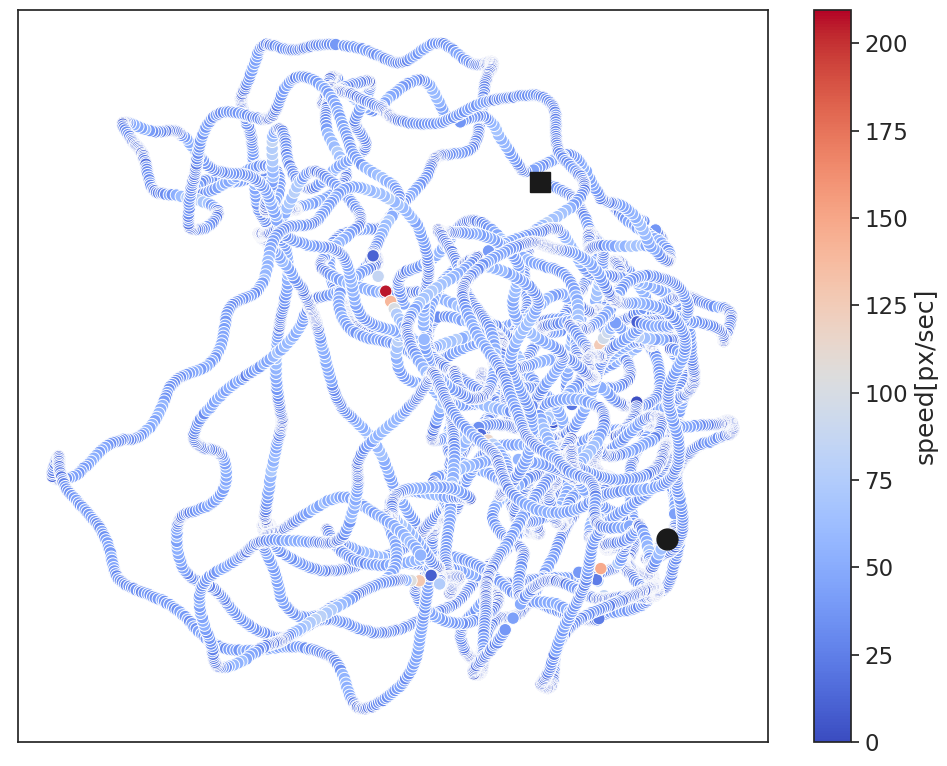

In [4]:
#plot speed map; square:initial point, circle:terminal point
plot_speed(data=data,num_particle=1)

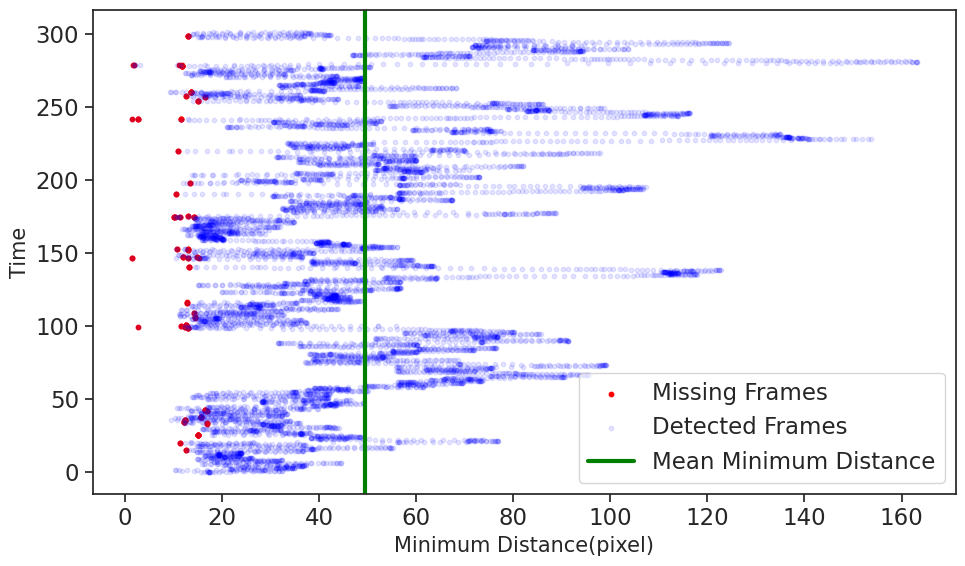

In [6]:
#check where we miss the frames
plot_missed_frames(data=data, num_particles=3)